## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [58]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [59]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_1700_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (102326, 30)


In [60]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [61]:
DA.df_raw

sn                   ts   er   pac        lng  \
0       SP00300022380165  2023-12-01 07:45:00  0.0  0.70  109.15253   
1       SP00300022380165  2023-12-01 07:50:00  0.0  1.08  109.15253   
2       SP00300022380165  2023-12-01 07:55:00  0.0  1.31  109.15253   
3       SP00300022380165  2023-12-01 08:00:00  0.0  1.44  109.15253   
4       SP00300022380165  2023-12-01 08:05:00  0.0  1.57  109.15253   
...                  ...                  ...  ...   ...        ...   
102321  SP00300022380165  2025-05-10 19:10:00  0.0  0.02  109.15253   
102322  SP00300022380165  2025-05-10 19:15:00  0.0  0.02  109.15253   
102323  SP00300022380165  2025-05-10 19:20:00  0.0  0.02  109.15253   
102324  SP00300022380165  2025-05-10 19:25:00  0.0  0.02  109.15253   
102325  SP00300022380165  2025-05-10 19:30:00  0.0  0.01  109.15253   

              lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0       22.349422     阳光棚双坡    5.0         13.5786               72.4379  ...   
1       22.349422     阳光棚双坡    5.0             NaN                   NaN  ...   
2       22.349422     阳光棚双坡    5.0             NaN                   NaN  ...   
3       22.349422     阳光棚双坡    5.0         13.5861               72.5593  ...   
4       22.349422     阳光棚双坡    5.0             NaN                   NaN  ...   
...           ...       ...    ...             ...                   ...  ...   
102321  22.349422     阳光棚双坡    5.0             NaN                   NaN  ...   
102322  22.349422     阳光棚双坡    5.0         23.9903               96.4325  ...   
102323  22.349422     阳光棚双坡    5.0             NaN                   NaN  ...   
102324  22.349422     阳光棚双坡    5.0             NaN                   NaN  ...   
102325  22.349422     阳光棚双坡    5.0         23.8330               96.3454  ...   

        direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                         1.6230            42.1675          5.7352   
1                            NaN                NaN             NaN   
2                            NaN                NaN             NaN   
3                         4.8691            57.3836          5.7665   
4                            NaN                NaN             NaN   
...                          ...                ...             ...   
102321                       NaN                NaN             NaN   
102322                    0.8688             1.0361          2.6595   
102323                       NaN                NaN             NaN   
102324                       NaN                NaN             NaN   
102325                    0.0000             0.0000          3.0390   

        wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0               8.5131           9.1947             11.1335   
1                  NaN              NaN                 NaN   
2                  NaN              NaN                 NaN   
3               8.5271           9.2032             10.5794   
4                  NaN              NaN                 NaN   
...                ...              ...                 ...   
102321             NaN              NaN                 NaN   
102322          4.7508           5.3217             32.4313   
102323             NaN              NaN                 NaN   
102324             NaN              NaN                 NaN   
102325          5.3364           5.9575             32.2179   

        wind_direction_80m  wind_direction_120m        variable_date  \
0                  12.0496              12.3624  2023-12-01 07:45:00   
1                      NaN                  NaN                  NaN   
2                      NaN                  NaN                  NaN   
3                  11.4677              11.7715  2023-12-01 08:00:00   
4                      NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
102321                 NaN                  NaN                  NaN   
102322    

In [62]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [63]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                sn                   ts   er   pac  \
0      2023-12-01 07:45:00  SP00300022380165  2023-12-01 07:45:00  0.0  0.70   
1      2023-12-01 07:50:00  SP00300022380165  2023-12-01 07:50:00  0.0  1.08   
2      2023-12-01 07:55:00  SP00300022380165  2023-12-01 07:55:00  0.0  1.31   
3      2023-12-01 08:00:00  SP00300022380165  2023-12-01 08:00:00  0.0  1.44   
4      2023-12-01 08:05:00  SP00300022380165  2023-12-01 08:05:00  0.0  1.57   
...                    ...               ...                  ...  ...   ...   
151625 2025-05-10 19:10:00  SP00300022380165  2025-05-10 19:10:00  0.0  0.02   
151626 2025-05-10 19:15:00  SP00300022380165  2025-05-10 19:15:00  0.0  0.02   
151627 2025-05-10 19:20:00  SP00300022380165  2025-05-10 19:20:00  0.0  0.02   
151628 2025-05-10 19:25:00  SP00300022380165  2025-05-10 19:25:00  0.0  0.02   
151629 2025-05-10 19:30:00  SP00300022380165  2025-05-10 19:30:00  0.0  0.01   

              lng        lat roof_type  angle  temperature_2m  ...  \
0       109.15253  22.349422     阳光棚双坡    5.0         13.5786  ...   
1       109.15253  22.349422     阳光棚双坡    5.0             NaN  ...   
2       109.15253  22.349422     阳光棚双坡    5.0             NaN  ...   
3       109.15253  22.349422     阳光棚双坡    5.0         13.5861  ...   
4       109.15253  22.349422     阳光棚双坡    5.0             NaN  ...   
...           ...        ...       ...    ...             ...  ...   
151625  109.15253  22.349422     阳光棚双坡    5.0             NaN  ...   
151626  109.15253  22.349422     阳光棚双坡    5.0         23.9903  ...   
151627  109.15253  22.349422     阳光棚双坡    5.0             NaN  ...   
151628  109.15253  22.349422     阳光棚双坡    5.0             NaN  ...   
151629  109.15253  22.349422     阳光棚双坡    5.0         23.8330  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                 0.7459                    1.6230            42.1675   
1                    NaN                       NaN                NaN   
2                    NaN                       NaN                NaN   
3                 2.2377                    4.8691            57.3836   
4                    NaN                       NaN                NaN   
...                  ...                       ...                ...   
151625               NaN                       NaN                NaN   
151626            0.1480                    0.8688             1.0361   
151627               NaN                       NaN                NaN   
151628               NaN                       NaN                NaN   
151629            0.0000                    0.0000             0.0000   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0               5.7352          8.5131           9.1947             11.1335   
1                  NaN             NaN              NaN                 NaN   
2                  NaN             NaN              NaN                 NaN   
3               5.7665          8.5271           9.2032             10.5794   
4                  NaN             NaN              NaN                 NaN   
...                ...             ...              ...                 ...   
151625             NaN             NaN              NaN                 NaN   
151626          2.6595          4.7508           5.3217             32.4313   
151627             NaN             NaN              NaN                 NaN   
151628             NaN             NaN              NaN                 NaN   
151629          3.0390          5.3364           5.9575             32.2179   

        wind_direction_80m  wind_direction_120m        variable_date  
0                  12.0496              12.3624  2023-12-01 07:45:00  
1                      NaN                  NaN                  NaN  
2                      NaN                  NaN                  NaN  
3                  11.4677              11.7715  2023-12-01 08:00:00  
4                      NaN        

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [64]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    18,    129,    130,    131,    132,    133,    134,    135,    136,
           137,
        ...
        151458, 151459, 151460, 151461, 151462, 151463, 151464, 151465, 151466,
        151467],
       dtype='int64', length=73171),
 True)

In [65]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [66]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [67]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    18,    129,    130,    131,    132,    133,    134,    135,    136,
           137,
        ...
        151458, 151459, 151460, 151461, 151462, 151463, 151464, 151465, 151466,
        151467],
       dtype='int64', length=73171),
 True)

In [68]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [69]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [70]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(Index([    18,    129,    130,    131,    132,    133,    134,    135,    136,
           137,
        ...
        151458, 151459, 151460, 151461, 151462, 151463, 151464, 151465, 151466,
        151467],
       dtype='int64', length=73171),
 True)

In [71]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [72]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [73]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    18,    129,    130,    131,    132,    133,    134,    135,    136,
           137,
        ...
        151458, 151459, 151460, 151461, 151462, 151463, 151464, 151465, 151466,
        151467],
       dtype='int64', length=73171),
 True)

In [74]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [75]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [76]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    18,    129,    130,    131,    132,    133,    134,    135,    136,
           137,
        ...
        151458, 151459, 151460, 151461, 151462, 151463, 151464, 151465, 151466,
        151467],
       dtype='int64', length=73171),
 True)

In [77]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [78]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [79]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([     1,      2,      4,      5,      7,      8,     10,     11,     13,
            14,
        ...
        151615, 151616, 151618, 151619, 151621, 151622, 151624, 151625, 151627,
        151628],
       dtype='int64', length=102238),
 True)

In [80]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                sn                   ts   er   pac  \
0      2023-12-01 07:45:00  SP00300022380165  2023-12-01 07:45:00  0.0  0.70   
1      2023-12-01 07:50:00  SP00300022380165  2023-12-01 07:50:00  0.0  1.08   
2      2023-12-01 07:55:00  SP00300022380165  2023-12-01 07:55:00  0.0  1.31   
3      2023-12-01 08:00:00  SP00300022380165  2023-12-01 08:00:00  0.0  1.44   
4      2023-12-01 08:05:00  SP00300022380165  2023-12-01 08:05:00  0.0  1.57   
...                    ...               ...                  ...  ...   ...   
151625 2025-05-10 19:10:00  SP00300022380165  2025-05-10 19:10:00  0.0  0.02   
151626 2025-05-10 19:15:00  SP00300022380165  2025-05-10 19:15:00  0.0  0.02   
151627 2025-05-10 19:20:00  SP00300022380165  2025-05-10 19:20:00  0.0  0.02   
151628 2025-05-10 19:25:00  SP00300022380165  2025-05-10 19:25:00  0.0  0.02   
151629 2025-05-10 19:30:00  SP00300022380165  2025-05-10 19:30:00  0.0  0.01   

              lng        lat roof_type  angle  temperature_2m  ...  \
0       109.15253  22.349422     阳光棚双坡    5.0       13.578600  ...   
1       109.15253  22.349422     阳光棚双坡    5.0       13.581100  ...   
2       109.15253  22.349422     阳光棚双坡    5.0       13.583600  ...   
3       109.15253  22.349422     阳光棚双坡    5.0       13.586100  ...   
4       109.15253  22.349422     阳光棚双坡    5.0       13.625067  ...   
...           ...        ...       ...    ...             ...  ...   
151625  109.15253  22.349422     阳光棚双坡    5.0       24.047400  ...   
151626  109.15253  22.349422     阳光棚双坡    5.0       23.990300  ...   
151627  109.15253  22.349422     阳光棚双坡    5.0       23.937867  ...   
151628  109.15253  22.349422     阳光棚双坡    5.0       23.885433  ...   
151629  109.15253  22.349422     阳光棚双坡    5.0       23.833000  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0               0.745900                  1.623000          42.167500   
1               1.243167                  2.705033          47.239533   
2               1.740433                  3.787067          52.311567   
3               2.237700                  4.869100          57.383600   
4               2.983567                  6.492133          63.748500   
...                  ...                       ...                ...   
151625          0.246667                  1.447967           1.726800   
151626          0.148000                  0.868800           1.036100   
151627          0.098667                  0.579200           0.690733   
151628          0.049333                  0.289600           0.345367   
151629          0.000000                  0.000000           0.000000   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0             5.735200        8.513100         9.194700           11.133500   
1             5.745633        8.517767         9.197533           10.948800   
2             5.756067        8.522433         9.200367           10.764100   
3             5.766500        8.527100         9.203200           10.579400   
4             5.778800        8.528333         9.201000           10.207767   
...                ...             ...              ...                 ...   
151625        2.553333        4.573433         5.125833           33.008733   
151626        2.659500        4.750800         5.321700           32.431300   
151627        2.786000        4.946000         5.533633           32.360167   
151628        2.912500        5.141200         5.745567           32.289033   
151629        3.039000        5.336400         5.957500           32.217900   

        wind_direction_80m  wind_direction_120m        variable_date  
0                12.049600            12.362400  2023-12-01 07:45:00  
1                11.855633            12.165433                  NaN  
2                11.661667            11.968467                  NaN  
3                11.467700            11.771500  2023-12-01 08:00:00  
4                11.071667        

In [81]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([], dtype='int64'), False)

In [82]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [83]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=151630, step=1), True)

In [84]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [85]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                sn                  ts  \
ts                                                                              
2023-12-01 07:45:00 2023-12-01 07:45:00  SP00300022380165 2023-12-01 07:45:00   
2023-12-01 07:50:00 2023-12-01 07:50:00  SP00300022380165 2023-12-01 07:50:00   
2023-12-01 07:55:00 2023-12-01 07:55:00  SP00300022380165 2023-12-01 07:55:00   
2023-12-01 08:00:00 2023-12-01 08:00:00  SP00300022380165 2023-12-01 08:00:00   
2023-12-01 08:05:00 2023-12-01 08:05:00  SP00300022380165 2023-12-01 08:05:00   
...                                 ...               ...                 ...   
2025-05-10 19:10:00 2025-05-10 19:10:00  SP00300022380165 2025-05-10 19:10:00   
2025-05-10 19:15:00 2025-05-10 19:15:00  SP00300022380165 2025-05-10 19:15:00   
2025-05-10 19:20:00 2025-05-10 19:20:00  SP00300022380165 2025-05-10 19:20:00   
2025-05-10 19:25:00 2025-05-10 19:25:00  SP00300022380165 2025-05-10 19:25:00   
2025-05-10 19:30:00 2025-05-10 19:30:00  SP00300022380165 2025-05-10 19:30:00   

                      er   pac        lng        lat roof_type  angle  \
ts                                                                      
2023-12-01 07:45:00  0.0  0.70  109.15253  22.349422     阳光棚双坡    5.0   
2023-12-01 07:50:00  0.0  1.08  109.15253  22.349422     阳光棚双坡    5.0   
2023-12-01 07:55:00  0.0  1.31  109.15253  22.349422     阳光棚双坡    5.0   
2023-12-01 08:00:00  0.0  1.44  109.15253  22.349422     阳光棚双坡    5.0   
2023-12-01 08:05:00  0.0  1.57  109.15253  22.349422     阳光棚双坡    5.0   
...                  ...   ...        ...        ...       ...    ...   
2025-05-10 19:10:00  0.0  0.02  109.15253  22.349422     阳光棚双坡    5.0   
2025-05-10 19:15:00  0.0  0.02  109.15253  22.349422     阳光棚双坡    5.0   
2025-05-10 19:20:00  0.0  0.02  109.15253  22.349422     阳光棚双坡    5.0   
2025-05-10 19:25:00  0.0  0.02  109.15253  22.349422     阳光棚双坡    5.0   
2025-05-10 19:30:00  0.0  0.01  109.15253  22.349422     阳光棚双坡    5.0   

                     temperature_2m  ...  direct_radiation  \
ts                                   ...                     
2023-12-01 07:45:00       13.578600  ...          0.745900   
2023-12-01 07:50:00       13.581100  ...          1.243167   
2023-12-01 07:55:00       13.583600  ...          1.740433   
2023-12-01 08:00:00       13.586100  ...          2.237700   
2023-12-01 08:05:00       13.625067  ...          2.983567   
...                             ...  ...               ...   
2025-05-10 19:10:00       24.047400  ...          0.246667   
2025-05-10 19:15:00       23.990300  ...          0.148000   
2025-05-10 19:20:00       23.937867  ...          0.098667   
2025-05-10 19:25:00       23.885433  ...          0.049333   
2025-05-10 19:30:00       23.833000  ...          0.000000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2023-12-01 07:45:00                  1.623000          42.167500   
2023-12-01 07:50:00                  2.705033          47.239533   
2023-12-01 07:55:00                  3.787067          52.311567   
2023-12-01 08:00:00                  4.869100          57.383600   
2023-12-01 08:05:00                  6.492133          63.748500   
...                                       ...                ...   
2025-05-10 19:10:00                  1.447967           1.726800   
2025-05-10 19:15:00                  0.868800           1.036100   
2025-05-10 19:20:00                  0.579200           0.690733   
2025-05-10 19:25:00                  0.289600           0.345367   
2025-05-10 19:30:00                  0.000000           0.000000   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2023-12-01 07:45:00        5.735200        8.513100         9.194700   
2023-12-01 07:50:00        5.745633        8.517767         9.197533   
2023-12-01 07:55:00        5.756067        8.5

In [86]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [87]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [88]:
DA.df_raw

full_time                sn                  ts  \
2023-12-01 07:45:00 2023-12-01 07:45:00  SP00300022380165 2023-12-01 07:45:00   
2023-12-01 07:50:00 2023-12-01 07:50:00  SP00300022380165 2023-12-01 07:50:00   
2023-12-01 07:55:00 2023-12-01 07:55:00  SP00300022380165 2023-12-01 07:55:00   
2023-12-01 08:00:00 2023-12-01 08:00:00  SP00300022380165 2023-12-01 08:00:00   
2023-12-01 08:05:00 2023-12-01 08:05:00  SP00300022380165 2023-12-01 08:05:00   
...                                 ...               ...                 ...   
2025-05-10 19:10:00 2025-05-10 19:10:00  SP00300022380165 2025-05-10 19:10:00   
2025-05-10 19:15:00 2025-05-10 19:15:00  SP00300022380165 2025-05-10 19:15:00   
2025-05-10 19:20:00 2025-05-10 19:20:00  SP00300022380165 2025-05-10 19:20:00   
2025-05-10 19:25:00 2025-05-10 19:25:00  SP00300022380165 2025-05-10 19:25:00   
2025-05-10 19:30:00 2025-05-10 19:30:00  SP00300022380165 2025-05-10 19:30:00   

                      er   pac        lng        lat roof_type  angle  \
2023-12-01 07:45:00  0.0  0.70  109.15253  22.349422     阳光棚双坡    5.0   
2023-12-01 07:50:00  0.0  1.08  109.15253  22.349422     阳光棚双坡    5.0   
2023-12-01 07:55:00  0.0  1.31  109.15253  22.349422     阳光棚双坡    5.0   
2023-12-01 08:00:00  0.0  1.44  109.15253  22.349422     阳光棚双坡    5.0   
2023-12-01 08:05:00  0.0  1.57  109.15253  22.349422     阳光棚双坡    5.0   
...                  ...   ...        ...        ...       ...    ...   
2025-05-10 19:10:00  0.0  0.02  109.15253  22.349422     阳光棚双坡    5.0   
2025-05-10 19:15:00  0.0  0.02  109.15253  22.349422     阳光棚双坡    5.0   
2025-05-10 19:20:00  0.0  0.02  109.15253  22.349422     阳光棚双坡    5.0   
2025-05-10 19:25:00  0.0  0.02  109.15253  22.349422     阳光棚双坡    5.0   
2025-05-10 19:30:00  0.0  0.01  109.15253  22.349422     阳光棚双坡    5.0   

                     temperature_2m  ...  direct_normal_irradiance  \
2023-12-01 07:45:00       13.578600  ...                  1.623000   
2023-12-01 07:50:00       13.581100  ...                  2.705033   
2023-12-01 07:55:00       13.583600  ...                  3.787067   
2023-12-01 08:00:00       13.586100  ...                  4.869100   
2023-12-01 08:05:00       13.625067  ...                  6.492133   
...                             ...  ...                       ...   
2025-05-10 19:10:00       24.047400  ...                  1.447967   
2025-05-10 19:15:00       23.990300  ...                  0.868800   
2025-05-10 19:20:00       23.937867  ...                  0.579200   
2025-05-10 19:25:00       23.885433  ...                  0.289600   
2025-05-10 19:30:00       23.833000  ...                  0.000000   

                     diffuse_radiation  wind_speed_10m  wind_speed_80m  \
2023-12-01 07:45:00          42.167500        5.735200        8.513100   
2023-12-01 07:50:00          47.239533        5.745633        8.517767   
2023-12-01 07:55:00          52.311567        5.756067        8.522433   
2023-12-01 08:00:00          57.383600        5.766500        8.527100   
2023-12-01 08:05:00          63.748500        5.778800        8.528333   
...                                ...             ...             ...   
2025-05-10 19:10:00           1.726800        2.553333        4.573433   
2025-05-10 19:15:00           1.036100        2.659500        4.750800   
2025-05-10 19:20:00           0.690733        2.786000        4.946000   
2025-05-10 19:25:00           0.345367        2.912500        5.141200   
2025-05-10 19:30:00           0.000000        3.039000        5.336400   

                     wind_speed_120m  wind_direction_10m  wind_direction_80m  \
2023-12-01 07:45:00         9.194700           11.133500           12.049600   
2023-12-01 07:50:00         9.197533           10.948800           11.855633   
2023-12-01 07:55:00         9.200367           10.764100           11.661667   
2023-12-01 08:00:00         9.203200           10.579400           11.467700   
2023-12-01 08:05:00         9.201000           10.

In [89]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex([], dtype='datetime64[ns]', freq='5min'), False)

In [90]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [91]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(151630, 31)

In [92]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [93]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    21.490191
1        relative_humidity_2m    75.960087
2                dew_point_2m    16.811966
3                pressure_msl  1013.436410
4            surface_pressure  1008.748514
5   precipitation_probability    20.881788
6                 cloud_cover    66.000763
7             cloud_cover_low    35.614826
8             cloud_cover_mid    25.223156
9            cloud_cover_high    35.130263
10        shortwave_radiation   161.875535
11           direct_radiation    89.348791
12   direct_normal_irradiance   136.860318
13          diffuse_radiation    72.526744
14             wind_speed_10m     3.256422
15             wind_speed_80m     5.154374
16            wind_speed_120m     5.658765
17         wind_direction_10m   105.280694
18         wind_direction_80m   103.504595
19        wind_direction_120m   103.660016
20                   pac_copy     3.100924

In [94]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [95]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m     43.460981
1        relative_humidity_2m    267.967531
2                dew_point_2m     60.645487
3                pressure_msl     55.204287
4            surface_pressure     53.392257
5   precipitation_probability   1361.663978
6                 cloud_cover   1547.372427
7             cloud_cover_low   1627.842549
8             cloud_cover_mid   1221.260416
9            cloud_cover_high   1710.654963
10        shortwave_radiation  54844.170520
11           direct_radiation  26884.888864
12   direct_normal_irradiance  49668.810293
13          diffuse_radiation   9279.495824
14             wind_speed_10m      2.414055
15             wind_speed_80m      4.619315
16            wind_speed_120m      5.364203
17         wind_direction_10m   6827.862201
18         wind_direction_80m   6475.270072
19        wind_direction_120m   6462.229632
20                   pac_copy     27.671235

In [96]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [97]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            6.592494
1        relative_humidity_2m           16.369714
2                dew_point_2m            7.787521
3                pressure_msl            7.429959
4            surface_pressure            7.307001
5   precipitation_probability           36.900731
6                 cloud_cover           39.336655
7             cloud_cover_low           40.346531
8             cloud_cover_mid           34.946537
9            cloud_cover_high           41.360065
10        shortwave_radiation          234.188323
11           direct_radiation          163.966121
12   direct_normal_irradiance          222.865005
13          diffuse_radiation           96.330140
14             wind_speed_10m            1.553723
15             wind_speed_80m            2.149259
16            wind_speed_120m            2.316075
17         wind_direction_10m           82.630879
18         wind_direction_80m           80.469063
19        wind_direction_120m           80.387994
20                   pac_copy            5.260346

In [98]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [99]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    36.4190
1        relative_humidity_2m    99.5180
2                dew_point_2m    27.8517
3                pressure_msl  1034.8814
4            surface_pressure  1029.8432
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   923.7738
11           direct_radiation   756.1621
12   direct_normal_irradiance   868.3231
13          diffuse_radiation   435.4331
14             wind_speed_10m    10.2050
15             wind_speed_80m    15.4616
16            wind_speed_120m    16.7664
17         wind_direction_10m   359.4439
18         wind_direction_80m   358.0109
19        wind_direction_120m   357.8576
20                   pac_copy    31.2500

In [100]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [101]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m     2.6005
1        relative_humidity_2m    20.8394
2                dew_point_2m    -7.8098
3                pressure_msl   992.1323
4            surface_pressure   987.7164
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.1804
15             wind_speed_80m     0.2252
16            wind_speed_120m     0.2201
17         wind_direction_10m     1.4145
18         wind_direction_80m     1.5037
19        wind_direction_120m     0.9895
20                   pac_copy     0.0000

In [102]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [103]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    22.808400
1        relative_humidity_2m    78.653733
2                dew_point_2m    18.627233
3                pressure_msl  1013.275650
4            surface_pressure  1008.620967
5   precipitation_probability     0.000000
6                 cloud_cover    89.985300
7             cloud_cover_low    13.219267
8             cloud_cover_mid     6.619033
9            cloud_cover_high     8.240367
10        shortwave_radiation    10.338950
11           direct_radiation     0.602500
12   direct_normal_irradiance     2.891133
13          diffuse_radiation     8.009367
14             wind_speed_10m     3.145050
15             wind_speed_80m     5.200317
16            wind_speed_120m     5.758217
17         wind_direction_10m   109.062833
18         wind_direction_80m   108.589733
19        wind_direction_120m   109.519300
20                   pac_copy     0.000000

In [104]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [105]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333       19.006400             69.548467     13.616600   1008.941600   
0.666667       25.437767             86.627567     22.555133   1017.324667   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1004.337867                     0.0000      47.7456   
0.666667       1012.575067                     0.3427      99.8337   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333         3.023333         1.155900            0.0018  ...   
0.666667        47.998200        20.207367           55.0038  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333            0.0000                    0.0000             0.0000   
0.666667           31.9099                   79.1077            97.6667   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        2.382233        4.200933           4.6768           31.133567   
0.666667        3.890367        6.050500           6.6449          152.978067   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333           30.655133            31.187067      0.00  
0.666667          151.417667           151.416700      2.17  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [106]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000              0.124960      0.877012   
relative_humidity_2m             0.124960              1.000000      0.581839   
dew_point_2m                     0.877012              0.581839      1.000000   
pressure_msl                    -0.839367             -0.412538     -0.884841   
surface_pressure                -0.835040             -0.415676     -0.882832   
precipitation_probability        0.124921              0.298850      0.242836   
cloud_cover                     -0.040233              0.292955      0.110314   
cloud_cover_low                 -0.250726              0.248495     -0.082523   
cloud_cover_mid                 -0.391945              0.036246     -0.301602   
cloud_cover_high                 0.372107              0.246158      0.421245   
shortwave_radiation              0.387989             -0.414850      0.118232   
direct_radiation                 0.357928             -0.432660      0.079987   
direct_normal_irradiance         0.322926             -0.483279      0.024321   
diffuse_radiation                0.334001             -0.272100      0.151287   
wind_speed_10m                  -0.149224             -0.256603     -0.233417   
wind_speed_80m                  -0.233970             -0.160384     -0.256509   
wind_speed_120m                 -0.249856             -0.136488     -0.258183   
wind_direction_10m               0.477011              0.172885      0.469721   
wind_direction_80m               0.516863              0.211757      0.521680   
wind_direction_120m              0.523172              0.224523      0.533015   
pac_copy                         0.393061             -0.362035      0.148048   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.839367         -0.835040   
relative_humidity_2m          -0.412538         -0.415676   
dew_point_2m                  -0.884841         -0.882832   
pressure_msl                   1.000000          0.999969   
surface_pressure               0.999969          1.000000   
precipitation_probability     -0.197900         -0.198569   
cloud_cover                   -0.073294         -0.074819   
cloud_cover_low                0.157620          0.155899   
cloud_cover_mid                0.323294          0.321480   
cloud_cover_high              -0.440138         -0.440128   
shortwave_radiation           -0.074152         -0.069529   
direct_radiation              -0.056605         -0.052196   
direct_normal_irradiance      -0.020851         -0.016496   
diffuse_radiation             -0.083923         -0.080188   
wind_speed_10m                 0.123471          0.122689   
wind_speed_80m                 0.131490          0.129610   
wind_speed_120m                0.131583          0.129483   
wind_direction_10m            -0.459064         -0.457728   
wind_direction_80m            -0.505704         -0.504355   
wind_direction_120m           -0.514732         -0.513401   
pac_copy                      -0.108621         -0.104350   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.124921    -0.040233   
relative_humidity_2m                        0.298850     0.292955   
dew_point_2m                                0.242836     0.110314   
pressure_msl                               -0.197900    -0.073294   
surface_pressure                           -0.198569    -0.074819   
precipitation_probability                   1.000000     0.350252   
cloud_cover                                 0.350252     1.000000   
cloud_cover_low                             0.315050     0.591191   
cloud_cover_mid                             0.315961     0.477081   
cloud_cover_high                            0.241160     0.535944   
shortwave_radiation                         0.104509    -0.114820   
direct_radiation                            0.009152    -0.252057   
dire

In [107]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [108]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.767498
1        relative_humidity_2m          0.436892
2                dew_point_2m          0.971213
3                pressure_msl          0.942057
4            surface_pressure          0.941861
5   precipitation_probability          0.280902
6                 cloud_cover          0.605755
7             cloud_cover_low          0.577391
8             cloud_cover_mid          0.622538
9            cloud_cover_high          0.670268
10        shortwave_radiation         -0.350914
11           direct_radiation         -0.222932
12   direct_normal_irradiance         -0.174047
13          diffuse_radiation         -0.382890
14             wind_speed_10m          0.617050
15             wind_speed_80m          0.689947
16            wind_speed_120m          0.675258
17         wind_direction_10m          0.436307
18         wind_direction_80m          0.553326
19        wind_direction_120m          0.570716
20                   pac_copy         -0.264108

In [109]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [110]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([192446.69923557, 263891.9636715 , 270314.69727496]),
 'fft_periods': array([143, 288, 287])}

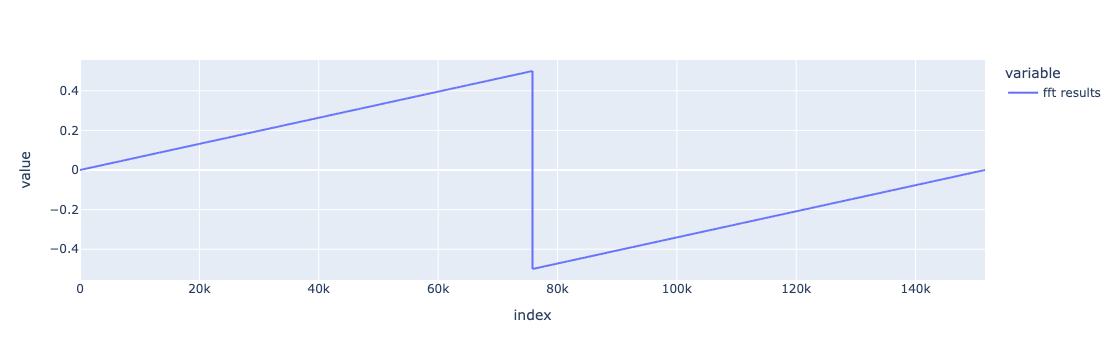

In [111]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [112]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -44.858776201320424,
  'P-value': 0.0,
  'Lags': np.int64(65),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -44.859
  P-value                         0.000
  Lags                               65
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [113]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-98.17195845747456),
  'P-value': 0.0,
  'Lags': 75,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -98.172
  P-value                         0.000
  Lags                               75
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [114]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -37.47432635092112,
  'P-value': 0.0,
  'Lags': np.int64(65),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -37.474
  P-value                         0.000
  Lags                               65
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}